# Explore the function of the magnetic field detectability

*Victor Ramirez Delgado*

## Introduction

Using the observational parameters for the minimum detectable B field I explore how its parameters change the detectability at certain cases.

## Derive the equation of the minimum B field

Starting with the equation for the detectable B field
$$ B_{0.1} = \left\{ 
  \begin{array}{ c l }
    \left(200+289 \times v\sin (i)\right) SNR^{-1} & \quad \textrm{if } v\sin(i) \leq 40 \mathrm{km/s} \\
    \left(-32243+ 1077.9 \times v\sin (i)\right) SNR^{-1}     & \quad \textrm{if } v\sin(i) > 40 \mathrm{km/s}
  \end{array}
\right.$$

To simplify things I define two constants, $k_1$ and $k_2$. For the case of  $v\sin(i) \leq 40 \mathrm{km/s}$, then $k_1 = 200$ and $k_2 = 289$, and on the other case $k_1 = -32243$ and $k_2 = 1077.9$. Then the equation becomes

$$ B_{0.1} = \left(k_1+ k_2  v\sin (i)\right) SNR^{-1} $$

Using the definition of $SNR$

$$ SNR_\mathrm{LSD} = SNR_\mathrm{1.8 km/s} \times LSD_\mathrm{gain}$$

where $ LSD_\mathrm{gain} = m \log T_\mathrm{eff} +b$ that were found doing a linear trend to the values of the temperature per spectral type. That converts the magnetic field into

$$ B_{0.1} = \frac{k_1+ k_2 v\sin (i)}{SNR_\mathrm{1.8 km/s}(m \log T_\mathrm{eff} +b)} $$

$SNR_\mathrm{1.8 km/s}$ is defined as

$$ SNR_\mathrm{1.8 km/s} =\left\{ 
  \begin{array}{ c l }
    SNR_\mathrm{bin} & \quad \textrm{if } v\sin(i) \leq 18 \mathrm{km/s} \\
    SNR_\mathrm{bin}\times{\sqrt{\frac{v\sin(i)}{18\mathrm{km/s}}}}     & \quad \textrm{if } v\sin(i) > 18 \mathrm{km/s}
  \end{array}
\right.$$

Giving a relation of 

$$ B_{0.1} =\left\{ 
  \begin{array}{ c l }
    \frac{k_1+ k_2 v\sin (i)}{SNR_\mathrm{bin}(m \log T_\mathrm{eff} +b)} & \quad \textrm{if } v\sin(i) \leq 18 \mathrm{km/s} \\
    \frac{k_1+ k_2 v\sin (i)}{SNR_\mathrm{bin}\sqrt{\frac{v\sin(i)}{18\mathrm{km/s}}}(m \log T_\mathrm{eff} +b)}     & \quad \textrm{if } v\sin(i) > 18 \mathrm{km/s}
  \end{array}
\right.$$

Next is the definition of $SNR_\mathrm{bin}$

$$ SNR_\mathrm{bin} = 430\times 10^{\frac{8.4-V}{5}} \sqrt{\frac{4~s_\mathrm{exp}}{3200}}$$

where $V$ is the visual magnitude and for the subexposure time $s_\mathrm{exp}$

$$s_\mathrm{exp} = \frac{t_\mathrm{exp}}{4}$$

where $t_\mathrm{exp}$ is the exposure time. The $SNR_\mathrm{bin}$ can be expressed as, and taking $p_1=430$, $p_2 = 3200$

$$ SNR_\mathrm{bin} = p_1\times 10^{\frac{8.4-V}{5}} \sqrt{\frac{t_\mathrm{exp}}{p_2}}$$

Finally the last expression for $B_{0.1}$ is

$$\Large B_{0.1} =\left\{ 
  \begin{array}{ c l }
    \frac{k_1+ k_2 v\sin (i)}{p_1\times 10^{\frac{8.4-V}{5}} \sqrt{\frac{t_\mathrm{exp}}{p_2}}(m \log T_\mathrm{eff} +b)} & \quad \textrm{if } v\sin(i) \leq 18 \mathrm{km/s} \\
    \frac{k_1+ k_2 v\sin (i)}{p_1\times 10^{\frac{8.4-V}{5}}\sqrt{\frac{t_\mathrm{exp}\times v\sin(i)}{p_2\times 18\mathrm{km/s}}}(m \log T_\mathrm{eff} +b)}     & \quad \textrm{if } v\sin(i) > 18 \mathrm{km/s}
  \end{array}
\right.$$

Now we proceed to code it and explore its behaviour

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#make better plots
plt.style.use(['science','notebook','grid'])
plt.rcParams.update({"font.size" : 26})
plt.rcParams.update({"axes.labelsize" : 26})
plt.rcParams.update({"xtick.labelsize" : 22})
plt.rcParams.update({"ytick.labelsize" : 22})
plt.rcParams.update({"axes.titlesize" : 26})
plt.rcParams.update({"figure.figsize": (10,8)})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [2]:
#define a function that computes the detectbale B field
def b_detect(vsini, V_mag, t_exp, log_Teff):
    #vsin i in km/s
    #t_exp in seconds
    # define constants and check value of vsini
    p1 = 430
    p2 = 3200
    m = -12.388115933619902
    b = 61.67535680103128
    if vsini <= 40:
        k1 = 200 
        k2 = 289
        if vsini <= 18:
            b_val = (k1+k2*vsini)/(p1*10**((8.4-V_mag)/5) *np.sqrt(t_exp/p2)*(m*log_Teff + b))
        else:
            b_val = (k1+k2*vsini)/(p1*10**((8.4-V_mag)/5) *np.sqrt(t_exp*vsini/(p2*18))*(m*log_Teff + b))
    else:
        k1 = -32243 
        k2 = 1077.9
        b_val = (k1+k2*vsini)/(p1*10**((8.4-V_mag)/5) *np.sqrt(t_exp*vsini/(p2*18))*(m*log_Teff + b))
    # return value in Gauss
    return b_val *100

In [3]:
#test out with a single value
V = 4
vsini = 10
t_exp = 3600
log_Teff = 4.4
test = b_detect(vsini, V, t_exp, log_Teff)
print(test, "Gauss")

12.460548864855166 Gauss


In [4]:
-12.388115933619902*5

-61.94057966809951

Seems like it works!Now to make some plots

## Make plot of B field as a function of $\log T_\mathrm{eff}$

Text(0.5, 1.0, 'B field detectability for $V=4$, and $t=3600s$')

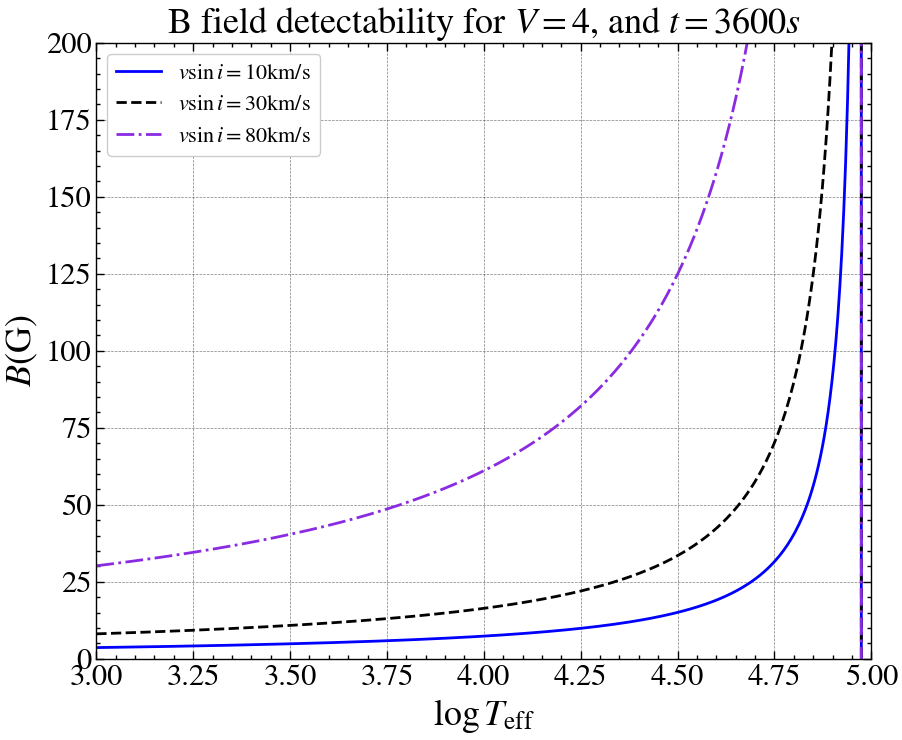

In [5]:
logsT = np.linspace(3, 5.5, 500)
vsinis = [10, 30, 80]
colors = ['b', 'k', 'blueviolet']
lines = ['-','--', '-.']
for i in range(len(vsinis)):
    bvals = b_detect(vsinis[i], V, t_exp, logsT)
    plt.plot(logsT, bvals, color = colors[i], label = r'$v\sin i ={}$km/s'.format(vsinis[i]), ls = lines[i])
plt.legend()
plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.ylabel(r'$B$(G)')
plt.xlim(3.0,5.0)
plt.ylim(0,200)
plt.title('B field detectability for $V={}$, and $t={}s$'.format(V,t_exp))

The relation blows up at $\log T_\mathrm{eff}$ becuase of the linear relation that appears in the equation for the value of $B_{min}$ because the terms become 0 as $\log T_\mathrm{eff} \rightarrow 5$. This has nothing to do with any physical phenomen this is because of the linear relation I assumed when calculating the LSD gains for all spectral classes.

Text(0.5, 1.0, 'B field detectability for $v~\\sin i=20$km/s, and $t=3600s$')

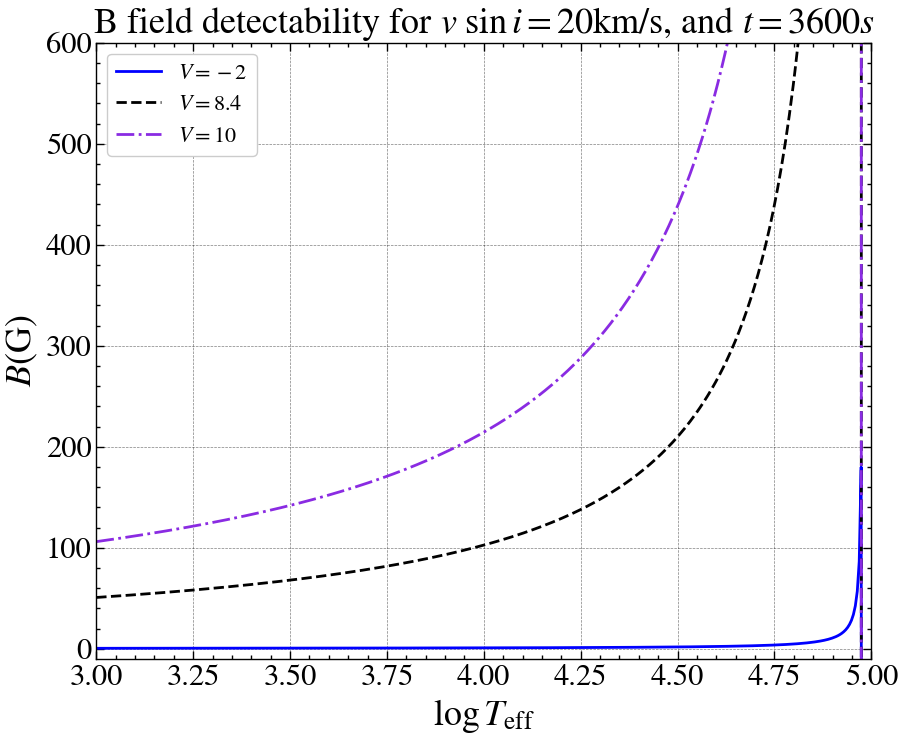

In [6]:
#try now using different apparent magntitudes
magnis = [-2,8.4, 10]
for i in range(len(magnis)):
    bvals = b_detect(20, magnis[i], t_exp, logsT)
    plt.plot(logsT, bvals, color = colors[i], label = r'$V={}$'.format(magnis[i]), ls = lines[i])
plt.legend()
plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.ylabel(r'$B$(G)')
plt.xlim(3.0,5.0)
plt.ylim(-10,600)
plt.title('B field detectability for $v~\sin i=20$km/s, and $t={}s$'.format(t_exp))

Text(0.5, 1.0, 'B field detectability for $v~\\sin i=20$km/s, and $V=5$')

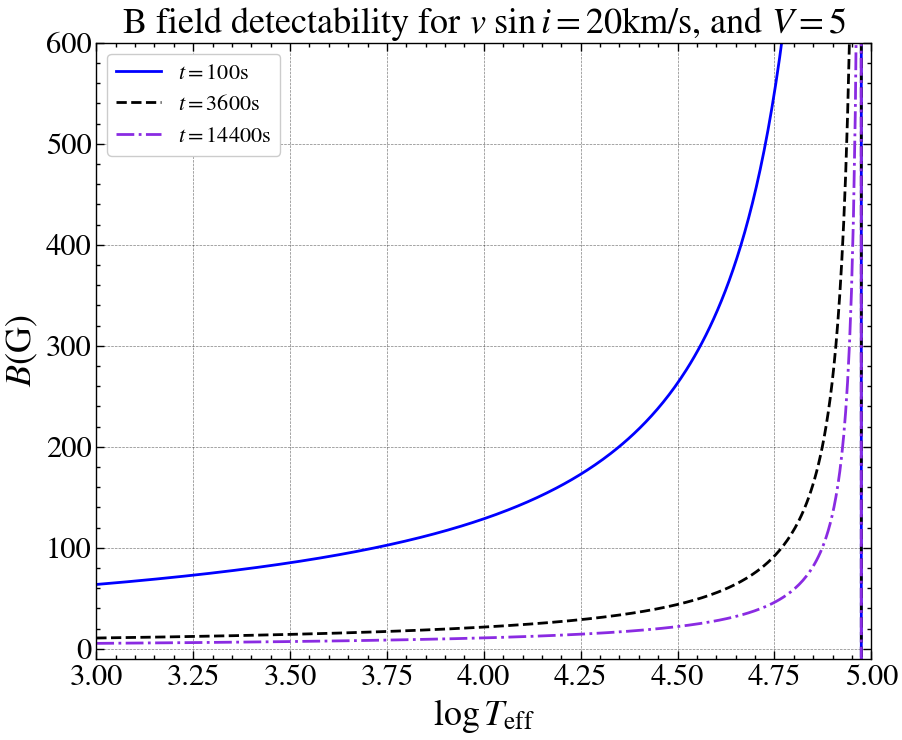

In [7]:
#now try with exposure time
texps = [100, 3600, 14400]
for i in range(len(magnis)):
    bvals = b_detect(20, 5, texps[i], logsT)
    plt.plot(logsT, bvals, color = colors[i], label = r'$t= {}$s'.format(texps[i]), ls = lines[i])
plt.legend()
plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.ylabel(r'$B$(G)')
plt.xlim(3.0,5.0)
plt.ylim(-10,600)
plt.title('B field detectability for $v~\sin i=20$km/s, and $V=5$')

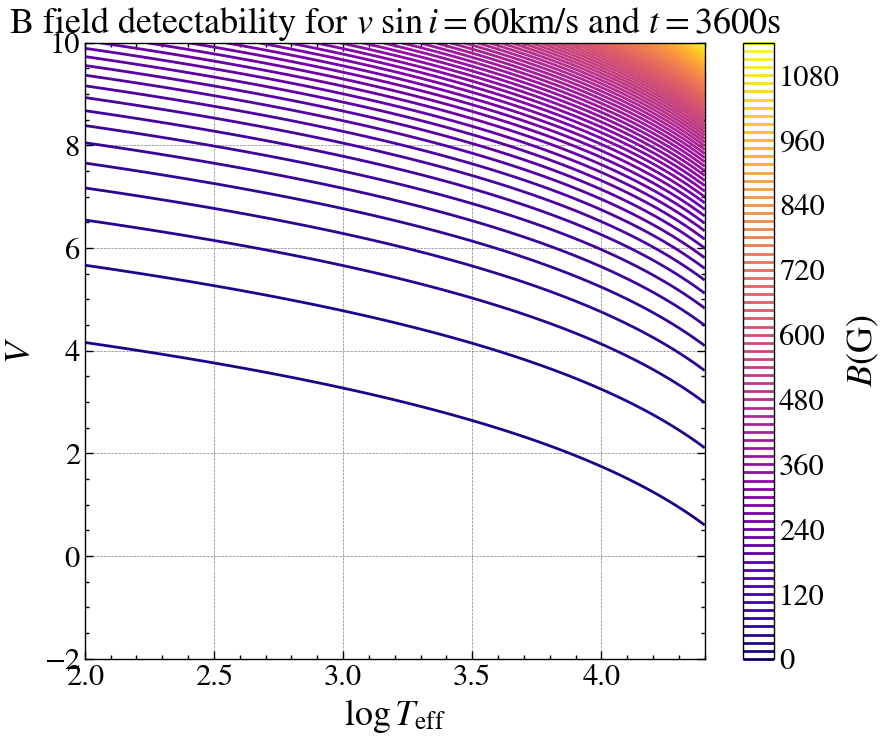

In [8]:
#try doing a contour plot
logTeffs = np.linspace(2, 4.4, 500)
magnitudes = np.linspace(-2, 10, 500)
LOGT, VS = np.meshgrid(logTeffs, magnitudes)
Z = b_detect(60, VS, 3600, LOGT)
plt.contour(LOGT, VS, Z, 100, cmap='plasma')
plt.xlabel(r'$\log T_\mathrm{eff}$');
plt.ylabel(r'$V$');
plt.colorbar(label ='$B$(G)')
plt.title('B field detectability for $v~\sin i = 60$km/s and $t = 3600$s');

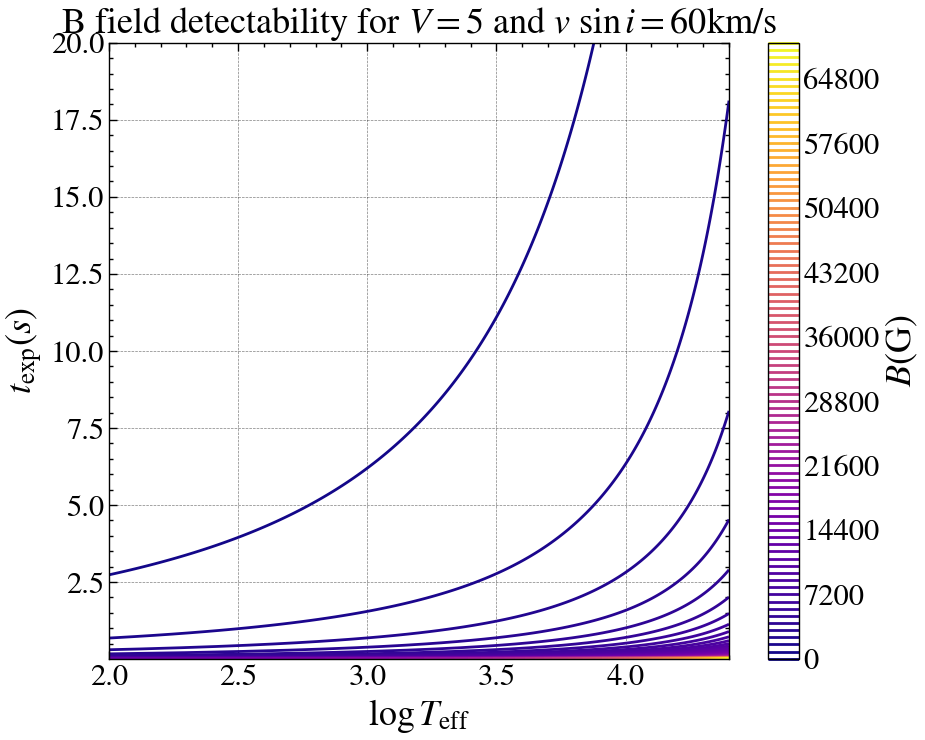

In [9]:
#try doing a contour plot
texposures = np.linspace(0.01,20, 500)
LOGT, TEXP = np.meshgrid(logTeffs,texposures) 
Z = b_detect(60, 5, TEXP , LOGT)
plt.contour(LOGT, TEXP, Z, 100, cmap='plasma')
plt.xlabel(r'$\log T_\mathrm{eff}$');
plt.ylabel(r'$t_\mathrm{exp} (s)$');
plt.colorbar(label ='$B$(G)');
plt.title('B field detectability for $V = 5$ and $v~\sin i = 60$km/s');

## Plot as a function of $v~\sin i$ 

Text(0.5, 1.0, 'B field detectability for $V=5$, and $t=2000s$')

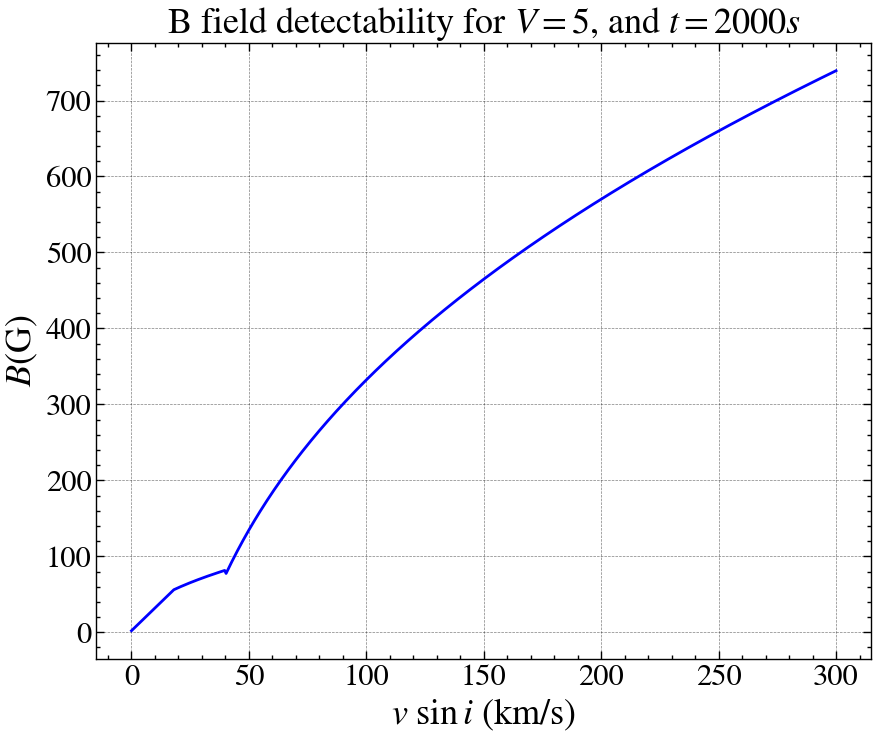

In [10]:
vsinis = np.linspace(0,300,500)
bvals = np.zeros(500)
for i in range(len(vsinis)):
    bvals[i] = b_detect(vsinis[i], 5, 2000, 4.5)

plt.plot(vsinis, bvals, color = colors[0], ls = lines[0])
#plt.legend()
plt.xlabel(r'$v~\sin i$ (km/s)')
plt.ylabel(r'$B$(G)')
#plt.xlim(3.0,5.0)
#plt.ylim(0,200)
plt.title('B field detectability for $V={}$, and $t={}s$'.format(5,2000))

## Create HR diagram with color contours of detectability 

In [11]:
# read MESA files 
def read_track(file):
    data = np.genfromtxt( file, skip_header=5, names=True)
    return (data)

Text(0, 0.5, '$\\log L/L_\\odot$')

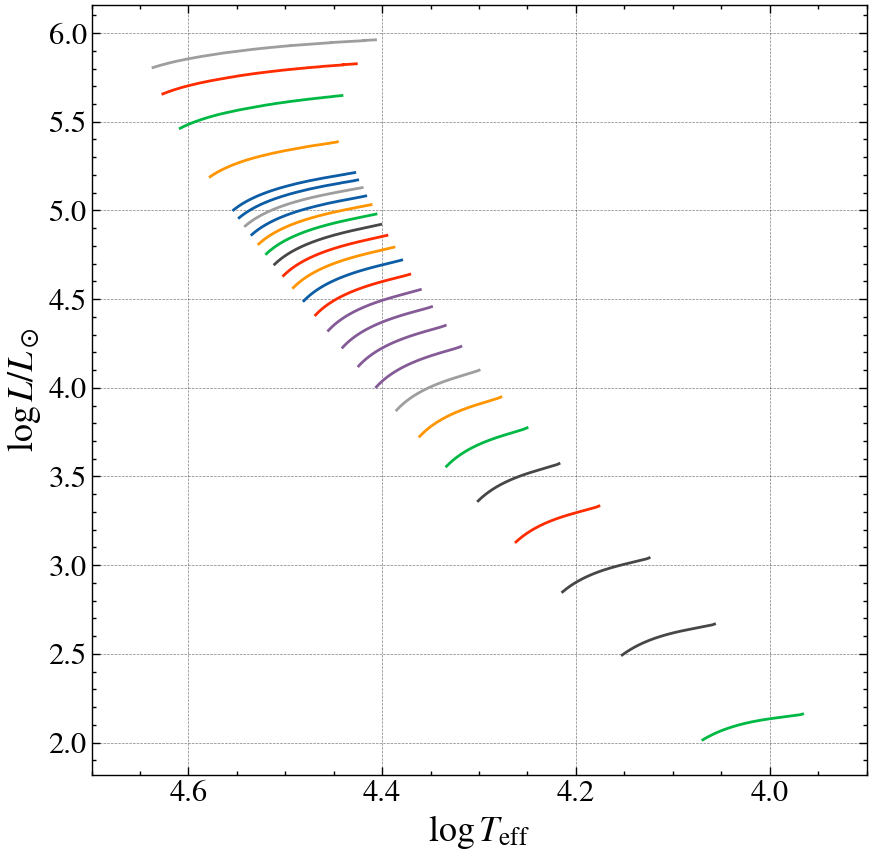

In [12]:
#read HR diagram of strongest magnetic field model
import os
path = 'Z14Mix1/50000'
cmap = plt.cm.plasma
htams = 0.05
plt.figure(figsize = (10,10))
for filename in os.listdir(path):
    f = os.path.join(path, filename)
    f = read_track(f+'/out.data')
    f = pd.DataFrame(f)
    h0 = np.max(f['center_h1'])
    hzams = h0 - h0*0.3
    f = (f[ f['center_h1']<= hzams]).reset_index(drop=True)
    f = (f[ f['center_h1']>= htams]).reset_index(drop=True)
    plt.plot(f['log_Teff'],f['log_L'])
    

plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.xlim(4.7,3.9)
plt.ylabel(r'$\log L/L_\odot$')

Now I can calculate the contour plot

In [13]:
#define function to calculate apparent magntiude THIS WILL ONLY work for STARS WITH LOGTEFF>3.9
def appm(distance,logL, logT):
    #constants for the sun
    v_sun = -26.76
    bc_sun = -0.06
    #constants to calculate bolometric corrections for stars of logTeff>3.9
    a = -0.118115450538963e6
    b= 0.137145973583929e6
    c = -0.636233812100225e5
    d = 0.147412923562646e5
    e = -0.170587278406872e4
    f = 0.788731721804990e2
    bc = a + b*logT + c*(logT)**2 + d*(logT)**3 +e*(logT)**4 + f*(logT)**5 
    absMv = -2.5*logL + v_sun +31.572-(bc- bc_sun)
    mag = absMv + 5*np.log10(distance/10)
    return mag

In [14]:
#redefine the vsini part
#define a function that computes the detectbale B field
def b_detect(vsini, V_mag, t_exp, log_Teff):
    #vsin i in km/s
    #t_exp in seconds
    # define constants and check value of vsini
    vsin = np.array(vsini)
    p1 = 430
    p2 = 3200
    m = -12.388115933619902
    b = 61.67535680103128
    for i in range(len(vsini)):
        if vsini[i] <= 40:
            k1 = 200 
            k2 = 289
            if vsini[i] <= 18:
                b_val = (k1+k2*vsini[i])/(p1*10**((8.4-V_mag)/5) *np.sqrt(t_exp/p2)*(m*log_Teff + b))
            else:
                b_val = (k1+k2*vsini[i])/(p1*10**((8.4-V_mag)/5) *np.sqrt(t_exp*vsini/(p2*18))*(m*log_Teff + b))
        else:
            k1 = -32243 
            k2 = 1077.9
            b_val = (k1+k2*vsini[i])/(p1*10**((8.4-V_mag)/5) *np.sqrt(t_exp*vsini/(p2*18))*(m*log_Teff + b))
    # return value in Gauss
    return b_val *100

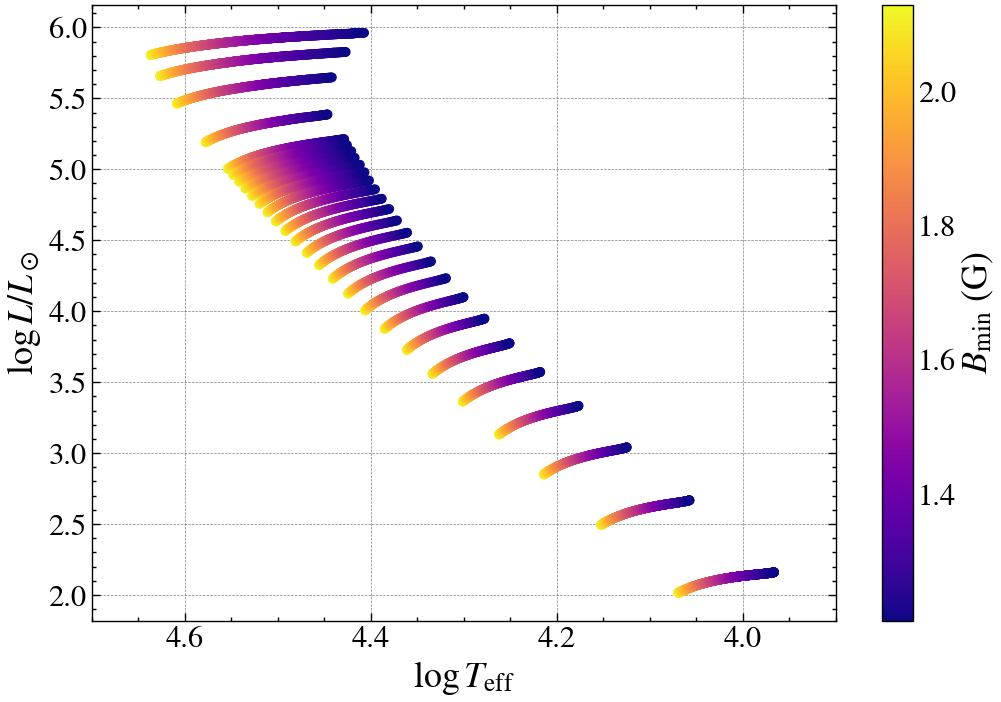

In [15]:
cmap = 'plasma'
dist = 400 #pc
i = np.pi/2 #inclination of 90 degrees for all stars
t_exp = 7200 #seconds
plt.figure(figsize=(12,8))
for filename in os.listdir(path):
    #read model
    f = os.path.join(path, filename)
    f = read_track(f+'/out.data')
    f = pd.DataFrame(f)
    #remove pre MS and the turn off MS
    h0 = np.max(f['center_h1'])
    hzams = h0 - h0*0.3
    f = (f[ f['center_h1']<= hzams]).reset_index(drop=True)
    f = (f[ f['center_h1']>= htams]).reset_index(drop=True)
    #set the vsini using the rotational speed of the model
    vsini = f['surf_avg_v_rot']*np.sin(i)
    # add the b field detectbaility
    vmags = appm(dist, f['log_L'], f['log_Teff'])
    bmins = b_detect(vsini, vmags, t_exp, f['log_Teff'])
    #plot
    plt.scatter(f['log_Teff'],f['log_L'], c = bmins, cmap = cmap)

plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.xlim(4.7,3.9)
plt.ylabel(r'$\log L/L_\odot$')
plt.colorbar(label = '$B_\mathrm{min}$ (G)')

Do the grid data for all the models

In [16]:
#create an array to store the values of logTeff and logL
logTs = np.empty(0)
logLs = np.empty(0)
bfiels = np.empty(0)
for filename in os.listdir(path):
    #read model
    f = os.path.join(path, filename)
    f = read_track(f+'/out.data')
    f = pd.DataFrame(f)
    #remove pre MS and the turn off MS
    h0 = np.max(f['center_h1'])
    hzams = h0 - h0*0.3
    f = (f[ f['center_h1']<= hzams]).reset_index(drop=True)
    f = (f[ f['center_h1']>= htams]).reset_index(drop=True)
    #define the arrays
    logT = f['log_Teff'].values
    logTs =np.concatenate((logTs,logT),axis =None)
    logL = f['log_L'].values
    logLs =np.concatenate((logLs,logL),axis = None)
    #set the vsini using the rotational speed of the model
    vsini = f['surf_avg_v_rot']*np.sin(i)
    # add the b field detectbaility
    vmags = appm(dist, f['log_L'], f['log_Teff'])
    bmins = b_detect(vsini, vmags, t_exp, f['log_Teff'])
    bfiels = np.concatenate((bfiels,bmins),axis = None)

In [17]:
#create the grid of points
logTlogL = np.array((logTs,logLs))
grid_T, grid_L = np.mgrid[np.min(logTs):np.max(logTs):500j, np.min(logLs):np.max(logLs):500j]

In [18]:
#do the interpolation
from scipy.interpolate import griddata
grid_B = griddata(logTlogL.T, bfiels, (grid_T, grid_L), method='cubic')

(4.7, 3.95)

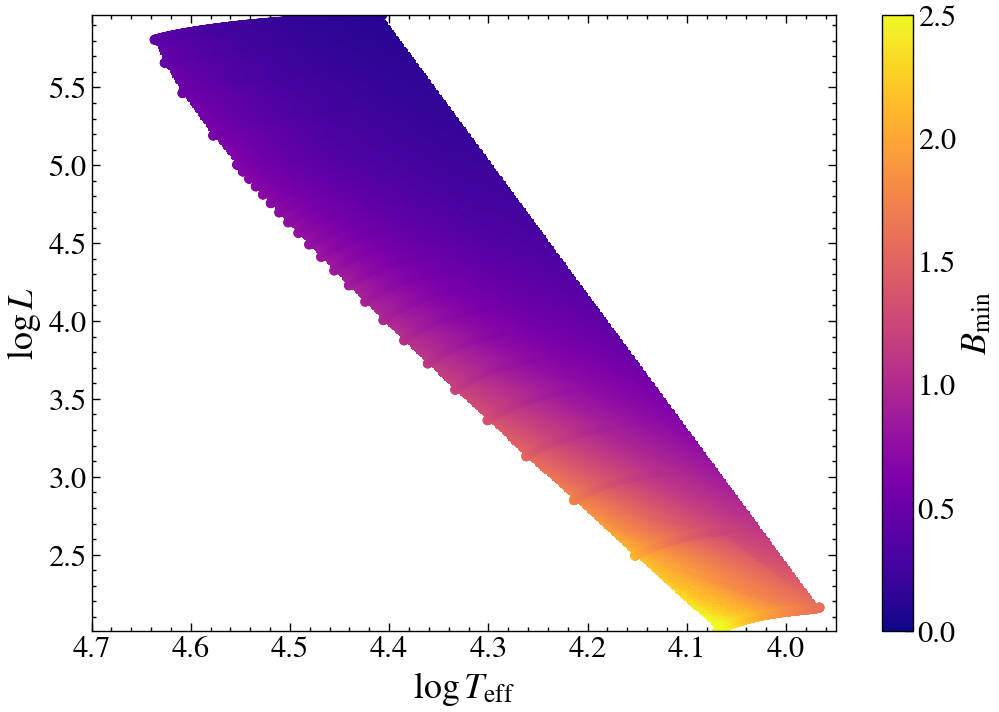

In [19]:
plt.figure(figsize = (12,8))
plt.pcolormesh(grid_T,grid_L,grid_B, vmin = 0, vmax = 2.5, cmap = 'plasma')
plt.scatter(logTs, logLs, c = bfiels, vmin = 0, vmax=2.5, cmap = 'plasma')
plt.colorbar(label = r'$B_\mathrm{min}$')
plt.xlabel('$\log T_\mathrm{eff}$')
plt.ylabel('$\log L$')
plt.xlim(4.7,3.95)